In [17]:
import os
from dotenv import load_dotenv
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime


In [18]:
file = r'C:\Users\palux\OneDrive\Документы\Python files DS\VK_api\Start\vk_users2.csv'

df = pd.read_csv(file)

In [19]:
df

,id,city,has_photo,last_seen,followers_count,relation,sex,first_name,last_name,can_access_closed,is_closed,status,bdate,deactivated,relation_partner,status_audio
0,6673,"{'id': 2, 'title': 'Saint Petersburg'}",1,"{'platform': 7, 'time': 1674355003}",12898.0,0.0,2,Mikhail,Gennadyevich,True,False,NaN,NaN,NaN,NaN,NaN
1,33185,"{'id': 1, 'title': 'Moscow'}",1,"{'platform': 4, 'time': 1743661497}",12834.0,0.0,1,Anaida,Zalevskaya,True,False,Клинический психолог. За консультацией обраща...,NaN,NaN,NaN,NaN
2,108453,"{'id': 73, 'title': 'Krasnoyarsk'}",1,"{'platform': 2, 'time': 1743661625}",NaN,NaN,2,Dmitry,Marmyshev,False,True,11050w,13.3,NaN,NaN,NaN
3,156429,"{'id': 2, 'title': 'Saint Petersburg'}",1,"{'platform': 4, 'time': 1743634955}",NaN,NaN,2,Dalay,Mongush,False,True,http://www.onetwotrip.com/ru/?lid=2dd88W2YG,27.9,NaN,NaN,NaN
4,176800,"{'id': 89, 'title': 'Nazran'}",1,"{'platform': 7, 'time': 1642256085}",2189.0,1.0,2,Ilnaz,Kayumov,True,False,"Простота, правда и естественность — вот три ос...",12.1.1985,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96264,1039765517,NaN,0,"{'platform': 4, 'time': 1743560415}",8.0,0.0,1,Zoya,Dorzhu,True,False,NaN,28.7.1966,NaN,NaN,NaN
96265,1039932875,NaN,0,"{'platform': 4, 'time': 1743648016}",0.0,0.0,2,Eres,Tyva,True,False,NaN,7.2.1974,NaN,NaN,NaN
96266,1039984196,NaN,1,"{'platform': 4, 'time': 1743660249}",1.0,0.0,1,Arzhaana,Ondar,True,False,NaN,8.7.1969,NaN,NaN,NaN
96267,1039990378,NaN,0,"{'platform': 4, 'time': 1743658294}",1.0,0.0,2,Ai,Lopsan,True,False,NaN,16.3.1964,NaN,NaN,NaN


In [20]:
# Раскрываем поле 'city'
df['city'] = df['city'].apply(lambda x: eval(x)['title'] if pd.notna(x) else np.nan)

# Преобразуем last_seen (последний вход в секунды в дату)
df['last_seen'] = df['last_seen'].apply(lambda x: datetime.utcfromtimestamp(eval(x)['time']).strftime('%Y-%m-%d') if pd.notna(x) else np.nan)

# Преобразуем bdate в возраст (учитываем формат 'д.м.гггг' и 'д.м')
def calculate_age(bdate):
    if isinstance(bdate, str) and len(bdate.split('.')) == 3:
        birth_year = int(bdate.split('.')[-1])
        return datetime.now().year - birth_year
    return np.nan

df['age'] = df['bdate'].apply(calculate_age)

# Удаляем ненужные столбцы
df = df[['sex', 'age', 'city', 'followers_count', 'last_seen', 'has_photo', 'relation', 'status']]

C:\Users\palux\AppData\Local\Temp\ipykernel_22452\3852934277.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df['last_seen'] = df['last_seen'].apply(lambda x: datetime.utcfromtimestamp(eval(x)['time']).strftime('%Y-%m-%d') if pd.notna(x) else np.nan)


In [21]:
df

,sex,age,city,followers_count,last_seen,has_photo,relation,status
0,2,NaN,Saint Petersburg,12898.0,2023-01-22,1,0.0,NaN
1,1,NaN,Moscow,12834.0,2025-04-03,1,0.0,Клинический психолог. За консультацией обраща...
2,2,NaN,Krasnoyarsk,NaN,2025-04-03,1,NaN,11050w
3,2,NaN,Saint Petersburg,NaN,2025-04-02,1,NaN,http://www.onetwotrip.com/ru/?lid=2dd88W2YG
4,2,40.0,Nazran,2189.0,2022-01-15,1,1.0,"Простота, правда и естественность — вот три ос..."
...,...,...,...,...,...,...,...,...
96264,1,59.0,NaN,8.0,2025-04-02,0,0.0,NaN
96265,2,51.0,NaN,0.0,2025-04-03,0,0.0,NaN
96266,1,56.0,NaN,1.0,2025-04-03,1,0.0,NaN
96267,2,61.0,NaN,1.0,2025-04-03,0,0.0,NaN


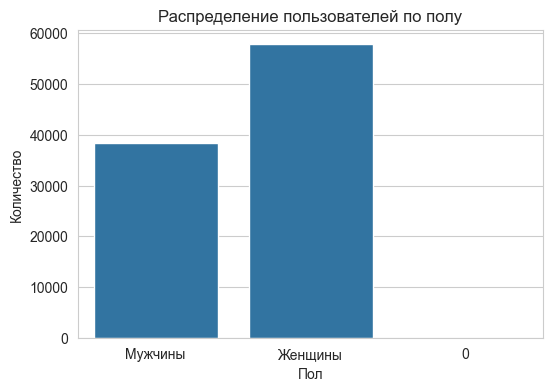

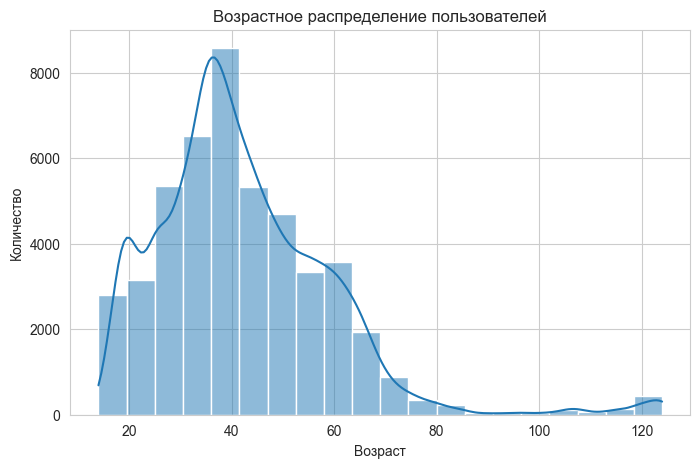

In [22]:
# Настройки графиков
sns.set_style("whitegrid")

# Распределение по полу
plt.figure(figsize=(6, 4))
sns.countplot(x=df["sex"].replace({1: "Женщины", 2: "Мужчины"}))
plt.title("Распределение пользователей по полу")
plt.xlabel("Пол")
plt.ylabel("Количество")
plt.show()

# Возрастное распределение
plt.figure(figsize=(8, 5))
sns.histplot(df["age"].dropna(), bins=20, kde=True)
plt.title("Возрастное распределение пользователей")
plt.xlabel("Возраст")
plt.ylabel("Количество")
plt.show()


C:\Users\palux\AppData\Local\Temp\ipykernel_22452\4098178695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_cities.index, x=top_cities.values, palette="coolwarm")


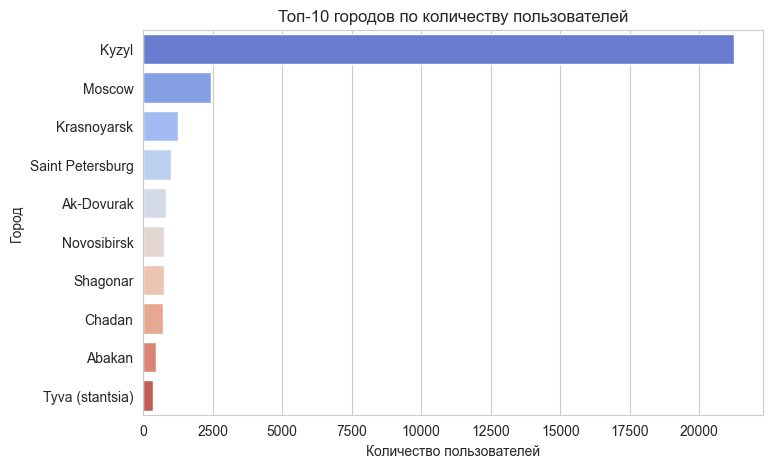

In [23]:
top_cities = df['city'].value_counts().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(y=top_cities.index, x=top_cities.values, palette="coolwarm")
plt.xlabel("Количество пользователей")
plt.ylabel("Город")
plt.title("Топ-10 городов по количеству пользователей")
plt.show()


In [44]:
bots_count = df[df["has_photo"] == 0].shape[0]
print(f"Аккаунтов без фото (возможно, боты): {bots_count} из {len(df)} ({bots_count / len(df) * 100:.2f}%)")

Аккаунтов без фото (возможно, боты): 34270 из 96269 (35.60%)


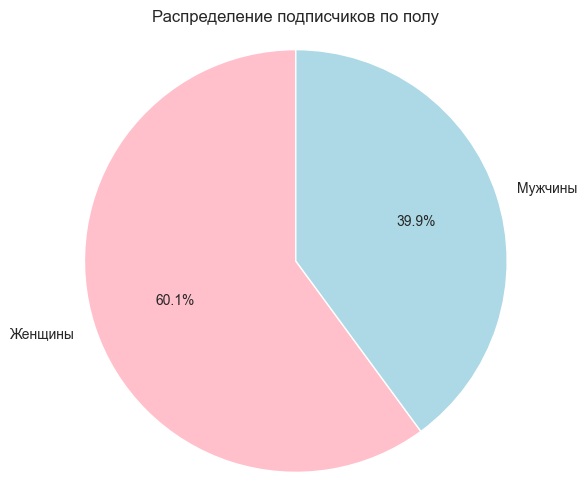

In [45]:
# Фильтруем только пол 1 и 2
df_sex = df[df['sex'].isin([1, 2])]

# Считаем
sex_counts = df_sex['sex'].value_counts().sort_index()

# Подписи
labels = ['Женщины', 'Мужчины']

# Круговая диаграмма
plt.figure(figsize=(6, 6))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['pink', 'lightblue'])
plt.title('Распределение подписчиков по полу')
plt.axis('equal')
plt.show()


In [47]:
df

,sex,age,city,followers_count,last_seen,has_photo,relation,status,city_title
0,2,NaN,Saint Petersburg,12898.0,2023-01-22,1,0.0,NaN,None
1,1,NaN,Moscow,12834.0,2025-04-03,1,0.0,Клинический психолог. За консультацией обраща...,None
2,2,NaN,Krasnoyarsk,NaN,2025-04-03,1,NaN,11050w,None
3,2,NaN,Saint Petersburg,NaN,2025-04-02,1,NaN,http://www.onetwotrip.com/ru/?lid=2dd88W2YG,None
4,2,40.0,Nazran,2189.0,2022-01-15,1,1.0,"Простота, правда и естественность — вот три ос...",None
...,...,...,...,...,...,...,...,...,...
96264,1,59.0,NaN,8.0,2025-04-02,0,0.0,NaN,None
96265,2,51.0,NaN,0.0,2025-04-03,0,0.0,NaN,None
96266,1,56.0,NaN,1.0,2025-04-03,1,0.0,NaN,None
96267,2,61.0,NaN,1.0,2025-04-03,0,0.0,NaN,None


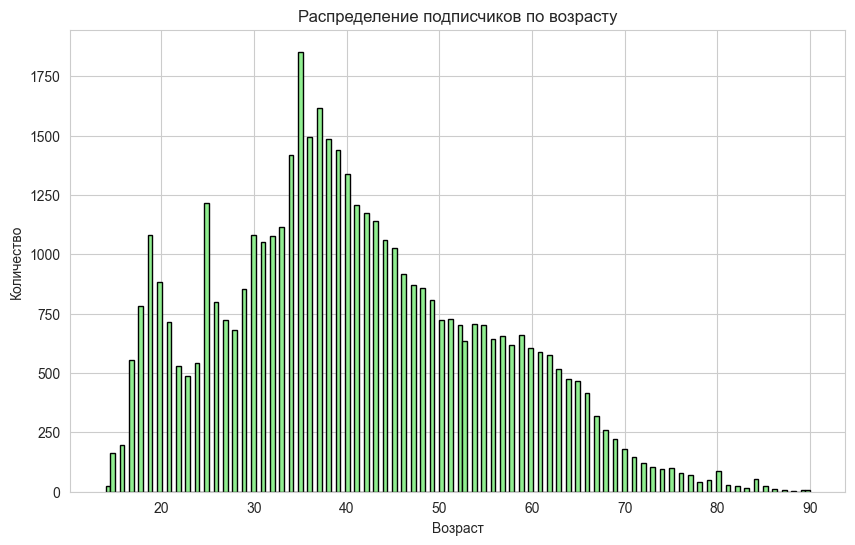

In [48]:
# Фильтруем только пользователей с полной датой рождения
df_bdate = df[df['age'].notnull()]

# Оставим возраст 10-80 лет
df_age = df_bdate[(df_bdate['age'] >= 10) & (df_bdate['age'] <= 90)]

# Столбцовая диаграмма
plt.figure(figsize=(10, 6))
df_age['age'].plot(kind='hist', bins=150, color='lightgreen', edgecolor='black')
plt.title('Распределение подписчиков по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.grid(True)
plt.show()


In [54]:
# Извлекаем только название города
df['city_title'] = df['city'].apply(lambda x: x['title'] if pd.notna(x) and isinstance(x, dict) else None)

C:\Users\palux\AppData\Local\Temp\ipykernel_22452\3926147542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city_title'] = df['city'].apply(lambda x: x['title'] if pd.notna(x) and isinstance(x, dict) else None)
